# Adaboost
For this exercise you will implement AdaBoost from scratch and applied it to a spam dataset. You will be classifying data into spam and not spam. You can call DecisionTreeClassifier from sklearn to learn your base classifiers.

Here is how you train a decision tree classifier with weights.

`
h = DecisionTreeClassifier(max_depth=1, random_state=0)
h.fit(X, Y, sample_weight=w)
`

### part 1

In [69]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [70]:
# accuracy computation
def accuracy(y, pred):
    return np.sum(y == pred) / float(len(y)) 

In [71]:
def parse_spambase_data(filename):
    """ Given a filename return X and Y numpy arrays

    X is of size number of rows x num_features
    Y is an array of size the number of rows
    Y is the last element of each row. (Convert 0 to -1)
    """
    data = pd.read_csv(filename, header = None)
    lastColumnIndex = data.shape[1]-1
    X = data.drop(lastColumnIndex, axis = 1)
    Y = data[lastColumnIndex]
    Y[Y==0] = -1
    return X, Y

In [72]:
y_test = np.array([1., -1., 1., 1., -1., -1., 1., 1., 1., -1.])
X, Y = parse_spambase_data("tiny.spam.train")
for i in range(len(y_test)): assert(y_test[i] == Y[i])
n, m = X.shape
assert(n == 10)
assert(m == 57)

/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [73]:

N=10
w = np.ones(N) / N
print(w)
sum(y_test == Y)
error = sum(w * (y_test != Y))/sum(w)
alpha = np.log((1-error)/error)
print(error)
print(np.exp(alpha * ((y_test != Y))))

[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
0.0
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: 57, dtype: float64


/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [87]:
def adaboost(X, y, num_iter):
    """Given an numpy matrix X, a array y and num_iter return trees and weights 
   
    Input: X, y, num_iter
    Outputs: array of trees from DecisionTreeClassifier
             trees_weights array of floats
    Assumes y is {-1, 1}
    """
    trees = []
    trees_weights = [] 
    N, _ = X.shape
    w = np.ones(N) / N
    for i in range(num_iter):
        h = DecisionTreeClassifier(max_depth=1, random_state=0)
        h.fit(X, y, sample_weight=w)
        error = np.sum(w * (h.predict(X) != y))/np.sum(w)
        alpha = np.log((1-error)/error)
        w = np.array(w * np.exp(alpha * (h.predict(X) != y)))
        trees.append(h)
        trees_weights.append(alpha)
    return trees, trees_weights

In [88]:
X, Y = parse_spambase_data("tiny.spam.train")
trees, weights = adaboost(X, Y, 2)
assert(len(trees) == 2)
assert(len(weights) == 2)
assert(isinstance(trees[0], DecisionTreeClassifier))

/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [89]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
h = trees[0]
pred = h.predict(x)
for i in range(len(y)): assert(pred[i] == y[i])

/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


In [90]:
def adaboost_predict(X, trees, trees_weights):
    """Given X, trees and weights predict Y
    """
    # X input, y output
    # N, _ =  X.shape
    # y = np.zeros(N)
    pred = np.sum([trees_weights[i] * trees[i].predict(X) for i in range(len(trees))], axis = 0)
    return np.sign(pred)

In [91]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
pred = adaboost_predict(x, trees, weights)
for i in range(len(y)):
    assert(pred[i] == y[i])

/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


In [92]:
X, Y = parse_spambase_data("spambase.train")
X_test, Y_test = parse_spambase_data("spambase.test")
trees, trees_weights = adaboost(X, Y, 10)
Yhat = adaboost_predict(X, trees, trees_weights)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)
    
acc_test = accuracy(Y_test, Yhat_test)
acc_train = accuracy(Y, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)
assert(np.around(acc_train, decimals=4)==0.9111)
assert(np.around(acc_test, decimals=4)==0.9190)

Train Accuracy 0.9111
Test Accuracy 0.9190


/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


### Part 2

Apply AdaBoost to spambase dataset using different values for the number of trees:
find the best value for numTrees using log loss of validation set

In [93]:
%%time 
trees, trees_weights = adaboost(X, Y, 10000)

CPU times: user 1min 21s, sys: 1.2 s, total: 1min 22s
Wall time: 1min 24s


In [95]:
numTreesList = range(0, 10000, 100)
acc = pd.DataFrame({"numTrees":np.zeros(len(numTreesList)), "trainAcc":np.zeros(len(numTreesList)), "valAcc":np.zeros(len(numTreesList))})
Yhat = np.zeros(X.shape[0])
Yhat_test = np.zeros(X_test.shape[0])
i = 0
for j in range(10000):   
    Yhat += trees_weights[j] * trees[j].predict(X)
    Yhat_test += trees_weights[j] * trees[j].predict(X_test)
    if j%100 == 0:
        trainAcc = accuracy(Y, np.sign(Yhat))
        valAcc = accuracy(Y_test, np.sign(Yhat_test))
        acc.iloc[i] = j, trainAcc, valAcc
        i += 1

/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


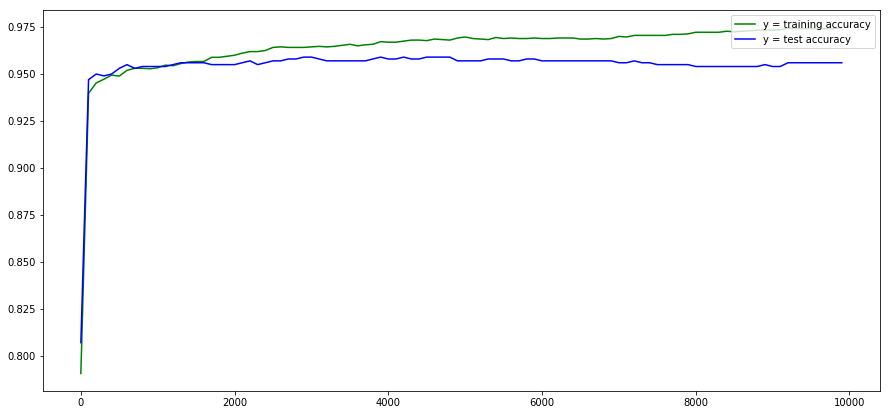

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.gca().set_color_cycle(['green', 'blue'])
plt.plot(acc['numTrees'], acc['trainAcc'])
plt.plot(acc['numTrees'], acc['valAcc'])
plt.legend(['y = training accuracy', 'y = test accuracy'], loc='upper right')
plt.show()

In [97]:
acc.sort_values(by = ['valAcc'], ascending = False).head()

,numTrees,trainAcc,valAcc
29,2900.0,0.964167,0.959
48,4800.0,0.968056,0.959
39,3900.0,0.967222,0.959
42,4200.0,0.967500,0.959
45,4500.0,0.967778,0.959


In the search of numTrees in (0, 10000) with intervel 100, the best numTrees = 2900, selected by the minimum log loss of validation set.

In [100]:
trainAcc = acc[acc['numTrees'] == 2900]['trainAcc']
valAcc = acc[acc['numTrees'] == 2900]['valAcc']

In [101]:
print('best numTrees:', '2900')
print('best training log loss: %.4f' %trainAcc)
print('best validation log loss: %.4f' %valAcc)

best numTrees: 2900
best training log loss: 0.9642
best validation log loss: 0.9590


### Part 3 

In [102]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [103]:
Y = Y.clip(0,1)
Y_test = Y_test.clip(0,1)

In [168]:
xgb1 = XGBClassifier(learning_rate = 0.1, n_estimators=
                    200, max_depth=5, min_child_weight=1, gamma=0, 
                     subsample=0.8, colsample_bytree=0.8, eval_metric=['error'], objective= 'binary:logistic')

In [169]:
xgb1.fit(X,Y, eval_set=[(X, Y), (X_test, Y_test)], eval_metric='error', verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eval_metric=['error'], gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [170]:
y_pred = xgb1.predict(X_test)

In [171]:
accuracy(Y_test, y_pred)

0.95899999999999996

compare XGB and Adaboost with same number of trees

In [172]:
acc_xgb = pd.DataFrame({"numTrees":np.zeros(30), "trainAcc":np.zeros(30), "valAcc":np.zeros(30)})
row = 0
for i in range(100, 3100, 100):
    xgb = XGBClassifier(learning_rate = 0.1, n_estimators=i, max_depth=5, min_child_weight=1, gamma=0, 
                     subsample=0.8, colsample_bytree=0.8, eval_metric=['error'], objective= 'binary:logistic')
    xgb.fit(X,Y)
    trainAcc = accuracy(Y, xgb.predict(X))
    valAcc = accuracy(Y_test, xgb.predict(X_test))
    acc_xgb.iloc[row] = i, trainAcc, valAcc
    row += 1

/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


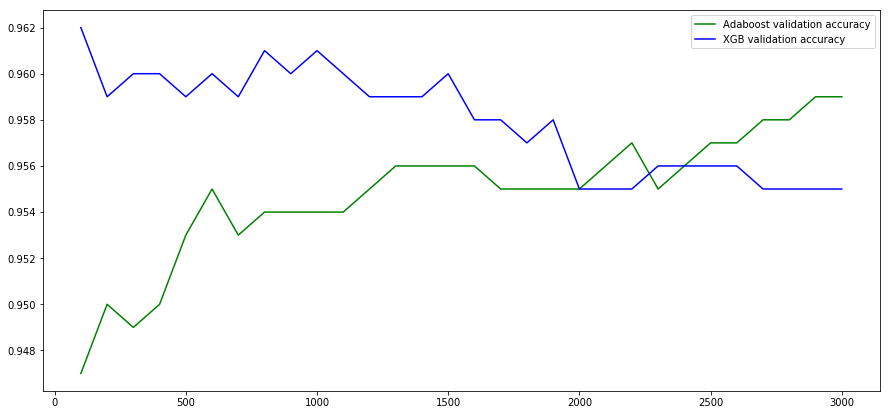

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.gca().set_color_cycle(['green', 'blue'])
plt.plot(acc['numTrees'][1:31], acc['valAcc'][1:31])
plt.plot(acc_xgb['numTrees'], acc_xgb['valAcc'])
plt.legend(['Adaboost validation accuracy', 'XGB validation accuracy'], loc='upper right')
plt.show()

/Users/SONGZIZHEN/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


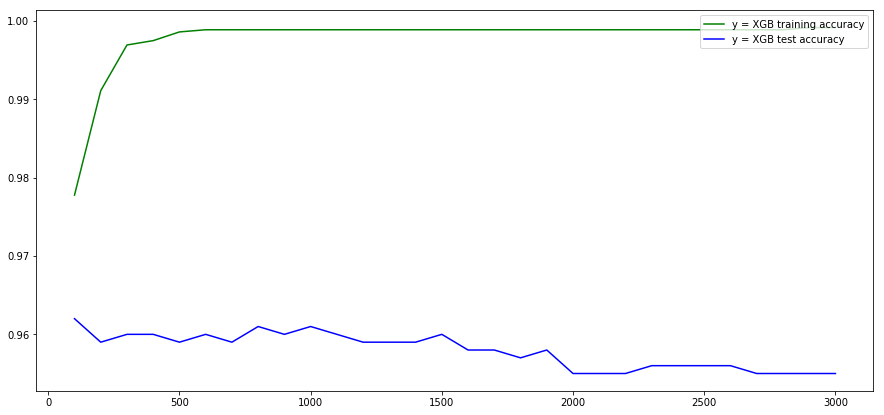

In [180]:
plt.figure(figsize=(15,7))
plt.gca().set_color_cycle(['green', 'blue'])
plt.plot(acc_xgb['numTrees'], acc_xgb['trainAcc'])
plt.plot(acc_xgb['numTrees'], acc_xgb['valAcc'])
plt.legend(['y = XGB training accuracy', 'y = XGB test accuracy'], loc='upper right')
plt.show()


tune hyperparameters

In [189]:
# final model
xgb = XGBClassifier(n_estimators = 1000, max_depth = 10, learning_rate = 0.05, n_jobs = -1, eval_metric = 'error',
                   objective = 'binary:logistic', min_child_weight = 1, subsample = 0.6)

In [190]:
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='error', gamma=0,
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [191]:
y_pred = xgb.predict(X_test)

In [192]:
accuracy(Y_test, y_pred)

0.96199999999999997